<a href="https://colab.research.google.com/github/sorayaindahs/streamlit_ecommerce/blob/main/analisis_data_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce
- **Nama:** Soraya Indah Setiani
- **Email:** sorayaindahs58@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Berdasarkan total transaksi setiap bulan, apakah cenderung mengalami kenaikan atau justru penurunan?
- Bagaimana klasifikasi pelanggan berdasarkan waktu terakhir melakukan transaksi (recency), total transaksi (frequency), dan total pembayaran yang dilakukan pelanggan (monetary)?
- Bagaimana persebaran negara asal pelanggan?


## Import Semua Packages/Library yang Digunakan

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [110]:
# Import dataset yang dibutuhkan
orders = pd.read_csv('orders_dataset.csv')
payments = pd.read_csv('order_payments_dataset.csv')
customers = pd.read_csv('customers_dataset.csv')


**Keterangan**
- order_id: ID untuk setiap pesanan (primary key)
-	customer_id: ID pelanggan yang melakukan pesanan (primary key)
-	order_status: Status pesanan
-	order_purchase_timestamp: Waktu pelanggan melakukan pembelian.
-	order_approved_at: Waktu ketika pembelian disetujui.
-	order_delivered_carrier_date: Waktu ketika pesanan diserahkan ke kurir untuk dikirim.
-	order_delivered_customer_date: Waktu ketika pesanan berhasil diterima oleh pelanggan.
-	order_estimated_delivery_date: Waktu perkiraan pesanan akan sampai ke pelanggan.
-	customer_unique_id: ID unik pelanggan.
-	customer_zip_code_prefix: Kode pos pelanggan (bagian awal).
-	customer_city: Kota tempat tinggal pelanggan.
-	customer_state: Negara tempat tinggal pelanggan.
-	payment_sequential: Urutan pembayaran dalam satu pesanan (jika ada lebih dari satu metode pembayaran).
-	payment_type: Metode pembayaran.
-	payment_installments: Jumlah cicilan pelanggan.
-	payment_value: Total pembayaran.



## Assessing Data

**orders_dataset**

In [111]:
# Identifikasi Missing Value
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Terlihat bahwa `orders_dataset` memiliki missing value pada variabel `order_approved_at` sebanyak *160* missing values, `order_delivered_carrier_date` sebanyak *1783* missing values, dan `order_delivered_customer_date` sebanyak *2965* missing values






In [112]:
# Identifikasi Duplikasi Data
orders.duplicated().sum()

0

Tidak terdapat duplikasi pada `orders_dataset `

In [113]:
# Memeriksa Tipe Data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**order_payments_dataset**

In [114]:
# Identifikasi Missing Value
payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Tidak terdapat missing value pada `order_payments_dataset`

In [115]:
# Identifikasi Duplikasi Data
payments.duplicated().sum()

0

Tidak terdapat duplikasi data pada `order_payments_dataset`

In [116]:
# Memeriksa Tipe Data
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**customers_dataset**

In [117]:
# Identifikasi Missing Value
customers.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Tidak terdapat missing value pada `customers_dataset`

In [118]:
# Identifikasi Duplikasi Data
payments.duplicated().sum()

0

Tidak terdapat duplikasi data pada `customers_dataset`

In [119]:
# Memeriksa Tipe Data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


## Cleaning Data

**orders_dataset**

In [120]:
# Membersihkan Missing Values
orders_df = orders.dropna(axis=0) #data yang sudah bersih didefinisikan sebagai orders_df
print(orders_df)

# Mengubah Tipe Data Agar Sesuai
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Set 'order_purchase_timestamp' as index
orders_df.set_index('order_purchase_timestamp', inplace=True)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

<ipython-input-120-99f1b525c567>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
<ipython-input-120-99f1b525c567>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
<ipython-input-120-99f1b525c567>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

## Exploratory Data Analysis (EDA)

Pada orders_dataset, terdapat variabel `order_purchase_timestamp	`yang dapat digunakan untuk menjawab pertanyaan terkait total penjualan setiap bulan, yaitu dengan menggunakan count.

In [121]:
# Menghitung Total Penjualan Setiap Bulan
monthly_orders_df = orders_df.resample(rule='M').agg({
    "order_id": "nunique"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%d-%m-%Y')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_orders_df.head()

<ipython-input-121-c5f67bd42700>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = orders_df.resample(rule='M').agg({


,order_purchase_timestamp,order_count
0,30-09-2016,1
1,31-10-2016,270
2,30-11-2016,0
3,31-12-2016,1
4,31-01-2017,748


RFM analysis digunakan untuk mengetahui Recency (terakhir pelanggan melakukan pembelian), Frequency (total transaksi yang dilakukan pelanggan), dan Monetary (Total pembayaran). Variabel yang dibutuhkan antara lain, `customer_id`, `order_id`, `order_purchase_timestamp`, dan `payment_value`

In [122]:
def load_data():
    global orders_df # Declare orders_df as global
    orders_df = orders_df.reset_index()
    orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
    return orders_df, payments

orders_df, payments = load_data()

# Gabungkan dataset jika diperlukan
df = pd.merge(orders_df, payments, on="order_id", how="left")

# Filter berdasarkan rentang tanggal (Gantilah dengan tanggal spesifik jika diperlukan)
min_date, max_date = df["order_purchase_timestamp"].min(), df["order_purchase_timestamp"].max()
date_range = [min_date, max_date]  # Anda bisa ubah ke rentang tanggal tertentu, contoh: ["2021-01-01", "2021-12-31"]

# Terapkan filter tanggal
filtered_df = df[
    (df["order_purchase_timestamp"] >= pd.to_datetime(date_range[0])) &
    (df["order_purchase_timestamp"] <= pd.to_datetime(date_range[1]))
]

# RFM Analysis
rfm_df = filtered_df.groupby("customer_id").agg(
    recency=("order_purchase_timestamp", lambda x: (max_date - x.max()).days),
    frequency=("order_id", "count"),
    monetary=("payment_value", "sum")
).reset_index()
print(rfm_df)


                            customer_id  recency  frequency  monetary
0      00012a2ce6f8dcda20d059ce98491703      287          1    114.74
1      000161a058600d5901f007fab4c27140      409          1     67.41
2      0001fd6190edaaf884bcaf3d49edf079      547          1    195.42
3      0002414f95344307404f0ace7a26f1d5      378          1    179.35
4      000379cdec625522490c315e70c7a9fb      149          1    107.01
...                                 ...      ...        ...       ...
96456  fffcb937e9dd47a13f05ecb8290f4d3e      165          1     91.91
96457  fffecc9f79fd8c764f843e9951b11341      152          3     81.36
96458  fffeda5b6d849fbd39689bb92087f431       99          1     63.13
96459  ffff42319e9b2d713724ae527742af25       76          1    214.13
96460  ffffa3172527f765de70084a7e53aae8      361          1     45.50

[96461 rows x 4 columns]


Untuk melihat demografi pelanggan berdasarkan negara tempat tinggalnya, dapat menggunakan variabel `customer_id`dan `customer_state`

In [123]:
# Menampilkan customer_state dan total customer yang tinggal di negara tersebut
bystate_df = customers.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


## Visualization & Explanatory Analysis

### Pertanyaan 1:
**Berdasarkan total transaksi setiap bulan, apakah cenderung mengalami kenaikan atau justru penurunan?**

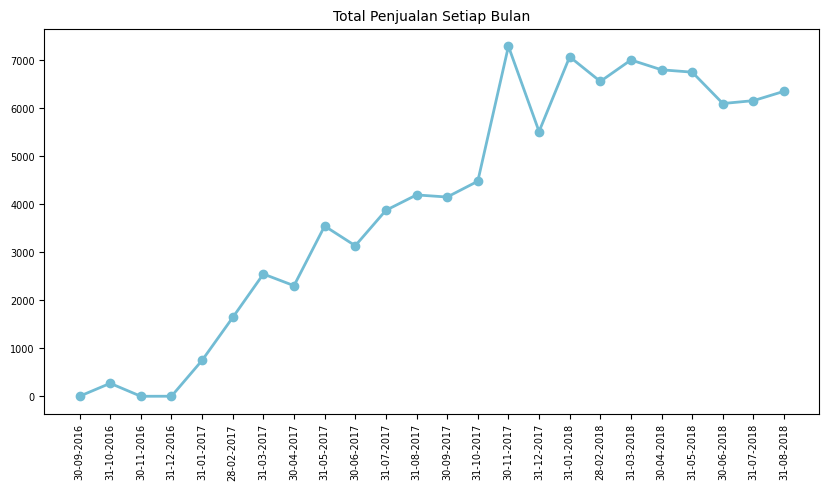

In [124]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Penjualan Setiap Bulan", loc="center", fontsize=10)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.show()

Berdasarkan plot `Total Transaksi Setiap Bulan`, terlihat membentuk tren naik, mulai dari transaksi terkecil sebesar 0 pada bulan November 2016 hingga transaksi yang mencapai lebih dari 700 transaksi pada bulan Desember 2017. Meskipun demikian, total transaksi setiap bulan mengalami fluktuasi.

### Pertanyaan 2:
**Bagaimana klasifikasi pelanggan berdasarkan waktu terakhir melakukan transaksi (recency), total transaksi (frequency), dan total pembayaran yang dilakukan pelanggan (monetary)?**

<ipython-input-125-dde400234289>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-125-dde400234289>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")
<ipython-input-125-dde400234289>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha="right")


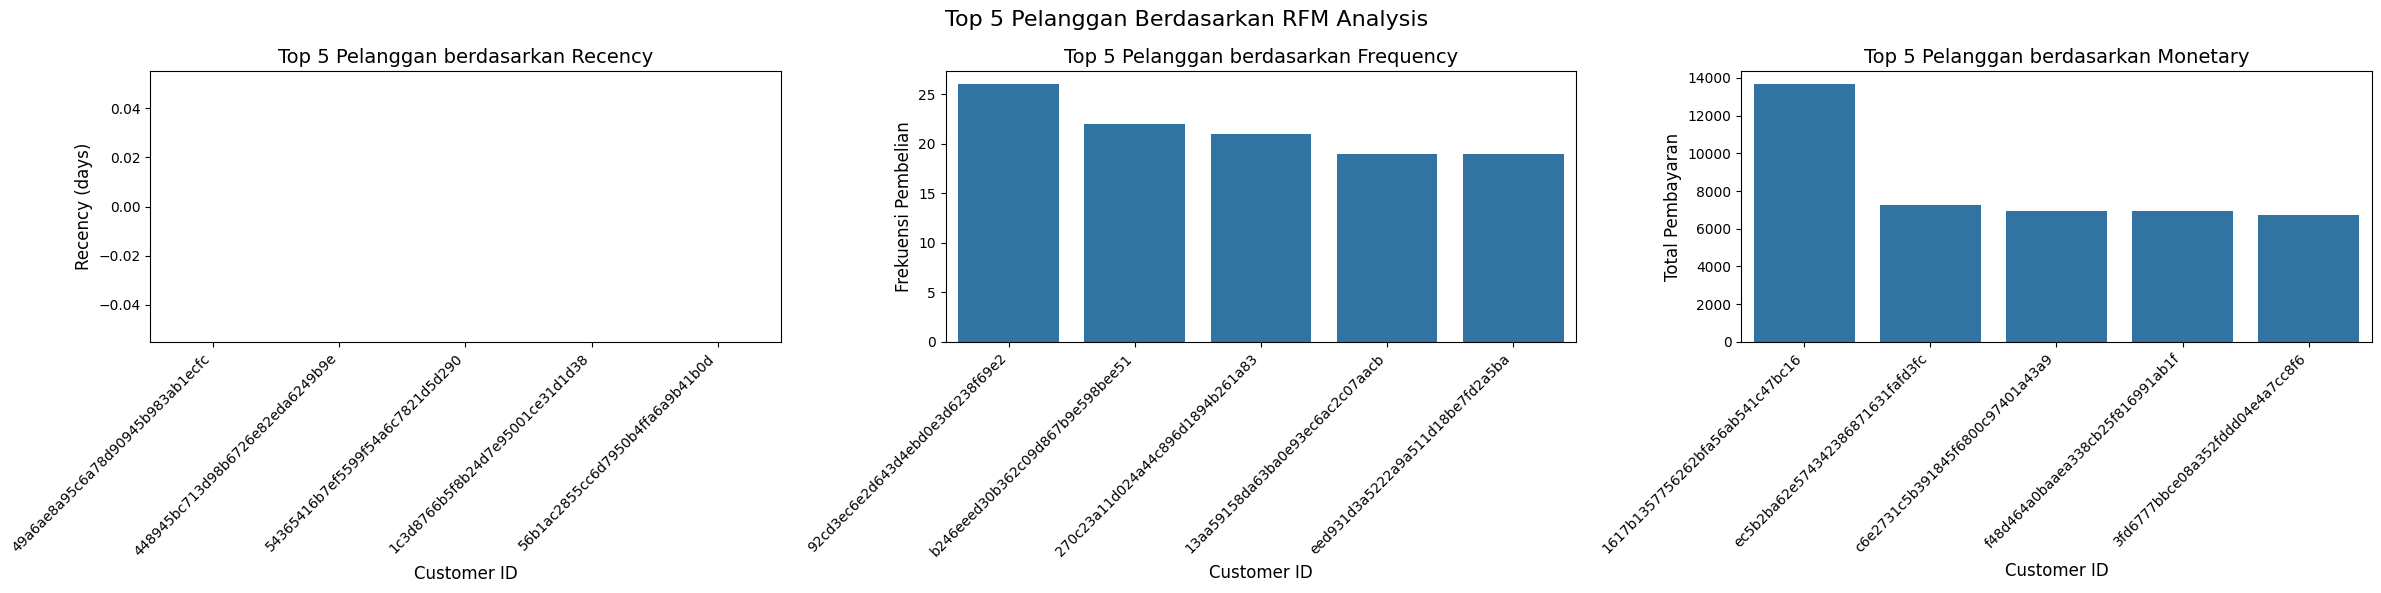

In [125]:
# Membuat Plot RFM Analysis
# Mengatur ukuran
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Plot untuk Top 5 Recency
sns.barplot(x="customer_id", y="recency",
            data=rfm_df.sort_values(by="recency", ascending=True).head(5),
            ax=ax[0])
ax[0].set_ylabel("Recency (days)", fontsize=12)
ax[0].set_xlabel("Customer ID", fontsize=12)
ax[0].set_title("Top 5 Pelanggan berdasarkan Recency", fontsize=14)
ax[0].tick_params(axis='x', rotation=45, labelsize=10)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")

# Plot untuk Top 5 Frequency
sns.barplot(x="customer_id", y="frequency",
            data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            ax=ax[1])
ax[1].set_ylabel("Frekuensi Pembelian", fontsize=12)
ax[1].set_xlabel("Customer ID", fontsize=12)
ax[1].set_title("Top 5 Pelanggan berdasarkan Frequency", fontsize=14)
ax[1].tick_params(axis='x', rotation=45, labelsize=10)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

# Plot untuk Top 5 Monetary
sns.barplot(x="customer_id", y="monetary",
            data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            ax=ax[2])
ax[2].set_ylabel("Total Pembayaran", fontsize=12)
ax[2].set_xlabel("Customer ID", fontsize=12)
ax[2].set_title("Top 5 Pelanggan berdasarkan Monetary", fontsize=14)
ax[2].tick_params(axis='x', rotation=45, labelsize=10)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha="right")


plt.suptitle("Top 5 Pelanggan Berdasarkan RFM Analysis", fontsize=16)
plt.tight_layout()
plt.show()

Plot Top `5 Pelanggan Berdasarkan RFM Analisis` menunjukkan bahwa
- Terdapat 5 `customer_id` yang melakukan transaksi pada waktu terakhir data `order_purchase_time` yang berarti 5 pelanggan tersebut adalah pelanggan terbaru. Pelanggan tersebut dapat diberi *special treat* agar lebih sering melakukan pembelian.
- Terdapat 5 `customer_id` dengan frekuensi pembelian terbanyak, 1 pelanggan yang melakuakan pembelian lebih dari 25 kali dan 4 pelanggan lebih dari 15 kali. Pelanggan tersebut dapat diberikan reward karena loyalitas, seperti gift atau kupon.
- Terdapat 5 `customer_id` dengan `payment_value` terbanyak yang berarti ada 5 pelanggan dengan total pembayaran terbanyak. Pelanggan tersebut dapat diberi reward karena telah menjadi penyumbang revenue terbanyak.

### Pertanyaan 3:
Bagaimana persebaran negara asal pelanggan?

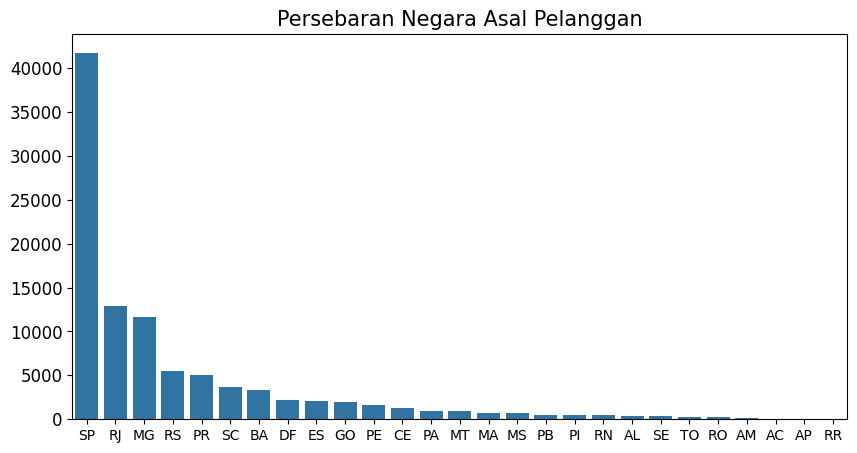

In [126]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_state",
    y="customer_count",
    data=bystate_df.sort_values(by="customer_count", ascending=False)
)
plt.title("Persebaran Negara Asal Pelanggan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan Plot `Persebaran Negara Asal Pelanggan`, terlihat bahwa mayoritas pelanggan berasal dari Sao Paulo (SP), yaitu sebanyak 41746 pelanggan, diikuti Rio de Janeiro(RJ), dan Belo Horizonte (MG).

# Conclusion

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa
1.   Total penjualan mengalamai tren naik, meskipun setiap bulan mengalami
     fluktuasi
2.   Berdasarkan RFM analysis, diketahui bahwa
     - Terdapat 5 pelanggan terbaru yang melakukan transaksi terakhir.
     - Terdapat 5 pelanggan yang paling sering melakukan pembelian, 1
       pelanggan telah melakukan pembelian lebih dari 25 kali, dan 4 pelanggan sisanya telah melakukan pembelian lebih dari 15 kali.
     - Terdapat 5 pelanggan dengan total pembayaran terbanyak.
     - Masing-masing pelanggan yang masuk kategori Top 5 RFM dapat  diberi reward atau special treat agar lebih sering melakukan pembelian
3.   Mayoritas pelanggan berasal dari Sao Paulo, Rio de Janeiro, dan Belo Horizonte

